## Regressão Logística

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
%matplotlib inline

In [23]:
df_train = pd.read_csv("/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv")

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análise Exploratória

<Axes: >

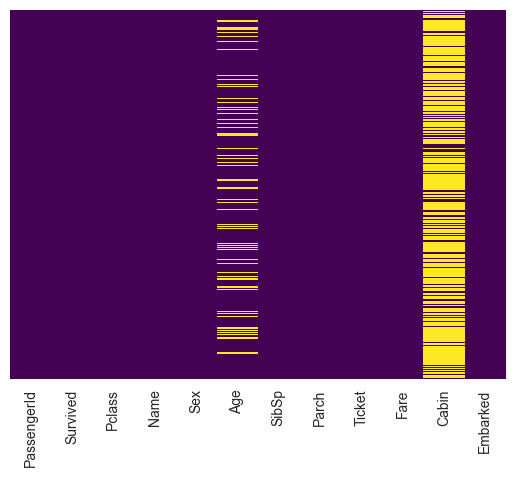

In [25]:
sns.heatmap(df_train.isnull(), 
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [26]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

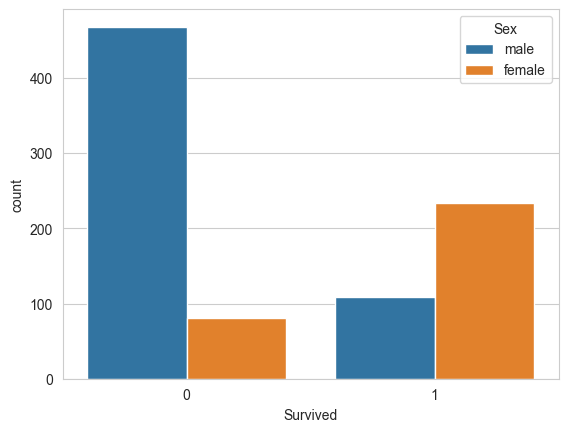

In [27]:
sns.countplot(data=df_train,x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

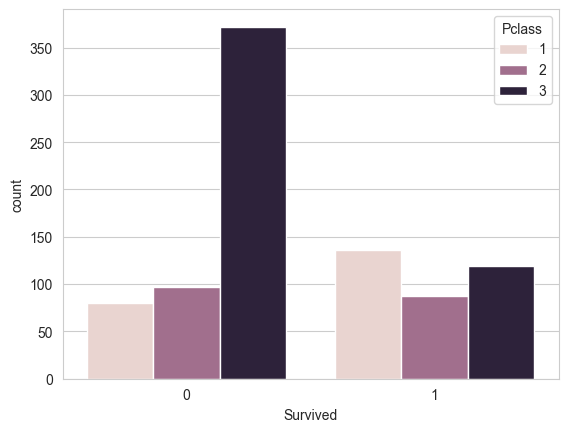

In [28]:
sns.countplot(data=df_train,x='Survived', hue='Pclass')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


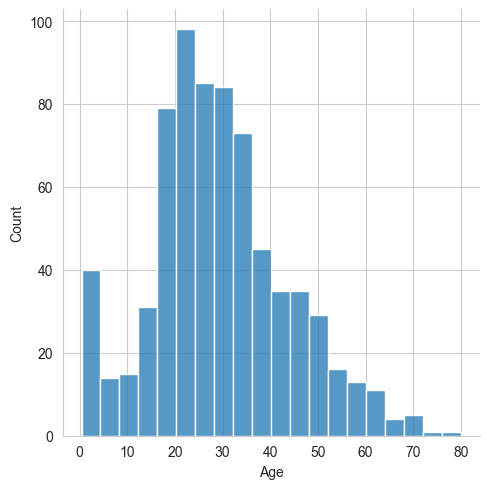

In [30]:
sns.displot(df_train['Age'].dropna())

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

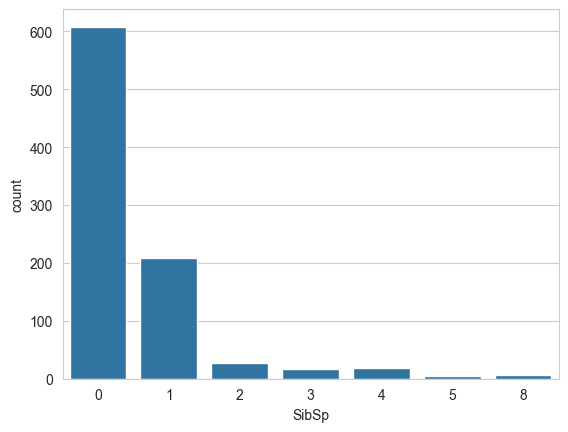

In [33]:
sns.countplot(x='SibSp',data=df_train)

<Axes: xlabel='Fare', ylabel='Count'>

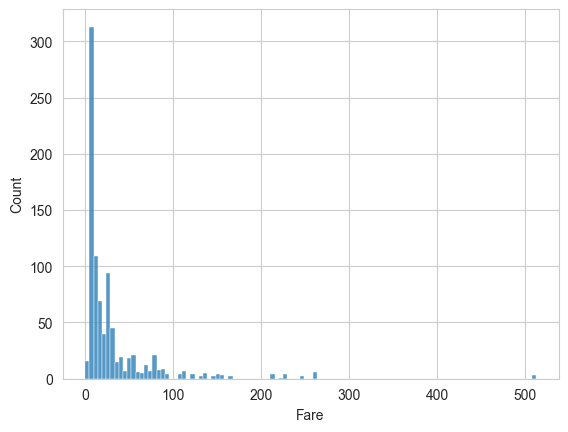

In [34]:
sns.histplot(df_train, x = 'Fare')

### Limpeza e inputação de dados

<Axes: xlabel='Pclass', ylabel='Age'>

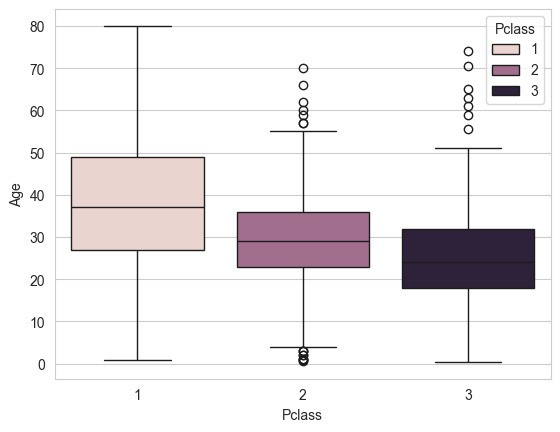

In [36]:
sns.boxplot(x='Pclass', y='Age', data=df_train, hue='Pclass')

In [14]:
def input_age(cols):
    age = cols[0]
    Pclass = cols[1]

    if pd.isnull(age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [40]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(input_age, axis=1)

<Axes: >

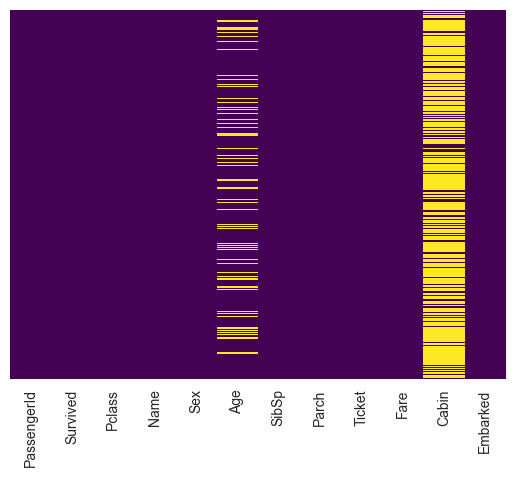

In [38]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

In [42]:
df_train = df_train.drop('Cabin', axis=1).copy()

In [43]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<Axes: >

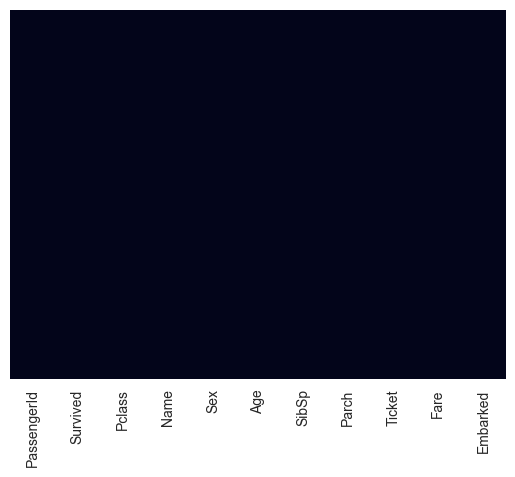

In [44]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

### Criando uma Dummy Variable

In [47]:
sex = pd.get_dummies(df_train['Sex'], drop_first=True)

In [48]:
embark = pd.get_dummies(df_train['Embarked'], drop_first=True)

In [50]:
df_train = pd.concat([df_train, sex, embark], axis=1)

In [54]:
df_train = df_train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1)

In [56]:
df_train = df_train.drop('PassengerId', axis=1).copy()

In [58]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### Tratamento dos dados de teste

In [59]:
df_teste = pd.read_csv('/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')

In [60]:
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
df_teste.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<Axes: >

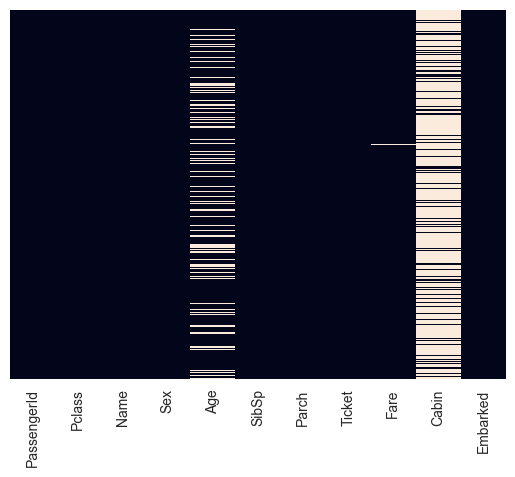

In [64]:
sns.heatmap(df_teste.isnull(), yticklabels=False, cbar=False)

In [65]:
df_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [67]:
df_teste['Age'] = df_teste[['Age', 'Sex']].apply(input_age, axis=1).copy()

In [68]:
df_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
df_teste = df_teste.drop('Cabin', axis=1).copy()

In [74]:
df_teste.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [75]:
df_teste['Fare'] = df_teste['Fare'].fillna(np.mean(df_teste['Fare'])).copy()

In [76]:
df_teste.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [79]:
sex_teste = pd.get_dummies(df_teste['Sex'], drop_first=True)
embark_teste = pd.get_dummies(df_teste['Embarked'], drop_first=True)

In [81]:
df_teste = pd.concat([df_teste, sex_teste, embark_teste], axis=1).copy()

In [84]:
df_teste = df_teste.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1).copy()

In [85]:
df_teste.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,True,True,False
1,3,47.0,1,0,7.0000,False,False,True
2,2,62.0,0,0,9.6875,True,True,False
3,3,27.0,0,0,8.6625,True,False,True
4,3,22.0,1,1,12.2875,False,False,True


## Modelo de Regressão Logística

In [102]:
X_train = df_train.iloc[:,1:].copy()
y_train = df_train['Survived'].copy()
X_test = df_teste.copy()

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
logistic_model = LogisticRegression()

In [105]:
logistic_model.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
predicao = logistic_model.predict(X_test)